In [1]:
import spot, buddy
import pandas as pd
spot.setup()

import tempfile

Test the Mealy printer.

In [2]:
g = spot.ltl_to_game('G((a|c) <-> (b|d))', ["b", "d"])

In [3]:
spot.solve_game(g)

True

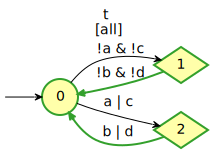

In [4]:
spot.highlight_strategy(g)

In [5]:
x = spot.solved_game_to_separated_mealy(g)

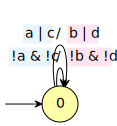

In [6]:
x

In [7]:
x.merge_edges()

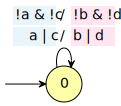

In [8]:
x

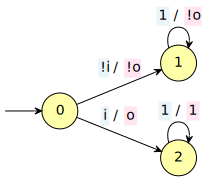

In [9]:
aut = spot.make_twa_graph()
i = buddy.bdd_ithvar(aut.register_ap("i"))
o = buddy.bdd_ithvar(aut.register_ap("o"))
spot.set_synthesis_outputs(aut, o)
aut.new_states(3)
aut.new_edge(0,1,buddy.bdd_not(i)&buddy.bdd_not(o))
aut.new_edge(0,2,i&o)
aut.new_edge(1,1,buddy.bdd_not(o))
aut.new_edge(2,2,buddy.bddtrue)
aut

('o',)


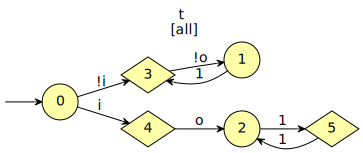

In [10]:
aut_s = spot.split_2step(aut)
print(spot.get_synthesis_output_aps(aut_s))
aut_s

,task,premin_time,reorg_time,partsol_time,player_incomp_time,incomp_time,split_all_let_time,split_min_let_time,split_cstr_time,prob_init_build_time,...,total_time,n_classes,n_refinement,n_lit,n_clauses,n_iteration,n_letters_part,n_bisim_let,n_min_states,done
0,presat,0.000101239,2.605e-06,1.0439e-05,9.1802e-05,9.398e-06,1.0469e-05,7.374e-06,8.556e-06,7.2616e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN
1,sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000400148,2,0,7,12,0,NaN,NaN,4,1


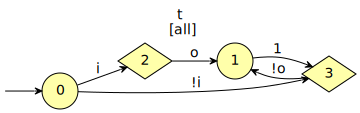

In [11]:
min_lvl = 0
aut_ms, table = spot.minimize_mealy(aut_s, min_lvl, display_log=True, return_log=True)
aut_ms

In [12]:
# Obtaining the csv file "manually"
# Only extract the number of values, otherwise the test will fail
si = spot.synthesis_info()
si.minimize_lvl = 3
with tempfile.NamedTemporaryFile(dir='.', suffix='.minlog') as t:
    si.opt.set_str("satlogcsv", t.name)
    si.opt.set_str("satinstancename", "dummy")
    aut_ms = spot.minimize_mealy(aut_s, si)
    t.seek(0)
    print([l.count(",") for l in t.read().decode("ascii").split("\n") if l])
    

[23, 23, 23]


## A more involved example

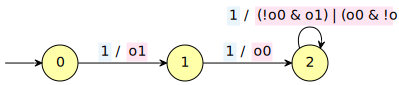

In [13]:
aut = spot.make_twa_graph()
i = buddy.bdd_ithvar(aut.register_ap("i"))
o0 = buddy.bdd_ithvar(aut.register_ap("o0"))
no0 = buddy.bdd_not(o0)
o1 = buddy.bdd_ithvar(aut.register_ap("o1"))
no1 = buddy.bdd_not(o1)
spot.set_synthesis_outputs(aut, o0&o1)

vo1 = o0&o1
vo2 = no0&o1
vo3 = o0&no1

aut.new_states(3)

aut.new_edge(0,1,vo1|vo2)
aut.new_edge(1,2,vo1|vo3)
aut.new_edge(2,2,vo2|vo3)
aut

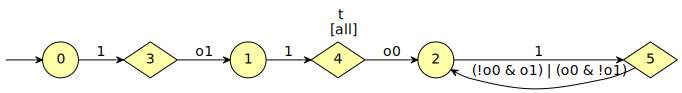

In [14]:
aut_s = spot.split_2step(aut)
aut_s

,task,premin_time,reorg_time,partsol_time,player_incomp_time,incomp_time,split_all_let_time,split_min_let_time,split_cstr_time,prob_init_build_time,...,total_time,n_classes,n_refinement,n_lit,n_clauses,n_iteration,n_letters_part,n_bisim_let,n_min_states,done
0,presat,1.1181e-05,3.006e-06,8.506e-06,0.000129682,6.963e-06,6.502e-06,5.34e-06,1.4908e-05,3.4505e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN
1,sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,3,6,0,NaN,NaN,NaN,NaN
2,refinement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,10,16,NaN,NaN,NaN,NaN,NaN
3,sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000412962,2,0,17,29,1,NaN,NaN,4,1


Number of variables
0    NaN
1      3
2     10
3     17
Name: n_lit, dtype: object


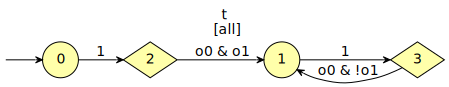

In [15]:
si = spot.synthesis_info()
si.minimize_lvl = 3
aut_ms, table = spot.minimize_mealy(aut_s, si, display_log=True, return_log=True)
print("Number of variables")
print(table["n_lit"])
aut_ms

## Testing dimacs output

In [16]:
import tempfile

si = spot.synthesis_info()
si.minimize_lvl = 3

with tempfile.NamedTemporaryFile(dir='.', suffix='.dimacslog') as t:
    si.opt.set_str("satlogdimacs", t.name)
    aut_ms, table = spot.minimize_mealy(aut_s, si, display_log=True, return_log=True)
    with open(t.name, "r") as f:
        print("".join(f.readlines()))
    
    

,task,premin_time,reorg_time,partsol_time,player_incomp_time,incomp_time,split_all_let_time,split_min_let_time,split_cstr_time,prob_init_build_time,...,total_time,n_classes,n_refinement,n_lit,n_clauses,n_iteration,n_letters_part,n_bisim_let,n_min_states,done
0,presat,1.2714e-05,2.435e-06,8.596e-06,0.000104425,6.943e-06,1.075e-05,5.28e-06,7.154e-06,3.9143e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN
1,sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,3,6,0,NaN,NaN,NaN,NaN
2,refinement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,10,16,NaN,NaN,NaN,NaN,NaN
3,sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000619207,2,0,17,29,1,NaN,NaN,4,1


c ### Next Instance 1 0 ###
p cnf 5 5
-1 2 -3 0
1 -3 0
1 -5 0
2 -5 0
3 -5 0
c ### Next Instance 1 1 ###
p cnf 12 15
-1 2 -3 0
4 0
6 0
-9 0
-1 -2 10 0
-10 0
1 -3 0
1 -5 0
1 -12 0
2 -5 0
2 -12 0
-2 9 0
3 -5 0
3 -12 0
7 8 0
c ### Next Instance 2 0 ###
p cnf 19 29
-3 -1 2 0
4 0
6 0
-9 0
-1 -2 10 0
-10 0
11 -16 -17 0
1 -15 -17 0
-1 13 -14 0
-11 13 -16 0
-11 -15 2 0
-13 -15 2 0
1 11 -19 0
13 -19 2 0
15 16 -19 0
3 14 -19 0
-2 0
-12 0
-5 0
1 -3 0
1 -5 0
1 -12 0
2 -5 0
2 -12 0
-2 9 0
3 -5 0
3 -12 0
7 8 0
11 -14 0



# Testing partitioned relabeling

In [17]:
def get_mealy():
    return spot.split_2step(spot.automaton("""HOA: v1
States: 2
Start: 0
AP: 11 "u0accel0accel" "u0accel0f1dcon23p81b" "u0accel0f1dcon231b" "u0gear0f1dmin0f1dcon61b0f1dadd0gear0f1dcon241b1b1b" "u0gear0gear" "u0gear0f1dmax0f1dcon241b0f1dsub0gear0f1dcon241b1b1b" "u0steer0f1dsteering0angle0trackpos1b" "u0steer0steer" "p0p0gt0rpm0f1dcon5523231b" "p0p0lt0rpm0f1dcon32323231b" "p0p0lt0speed0f1dsub0target2speed0f1dmultp0f1dabs0steer1b0f1dcon248881b1b1b"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc deterministic
controllable-AP: 0 1 2 3 4 5 6 7
--BODY--
State: 0
[!0&!1&2&!3&4&!5&6&!7&!8&!9&!10] 0
[!0&1&!2&!3&4&!5&6&!7&!8&!9&10] 0
[!0&!1&2&!3&!4&5&6&!7&!8&9&!10] 0
[!0&1&!2&!3&!4&5&6&!7&!8&9&10] 0
[!0&!1&2&3&!4&!5&6&!7&8&!9&!10] 0
[!0&1&!2&3&!4&!5&6&!7&8&!9&10] 0
[!0&!1&2&!3&!4&5&!6&7&8&9 | !0&!1&2&!3&!4&5&6&!7&8&9 | !0&!1&2&!3&4&!5&!6&7&8&9 | !0&!1&2&!3&4&!5&6&!7&8&9 | !0&!1&2&3&!4&!5&!6&7&8&9 | !0&!1&2&3&!4&!5&6&!7&8&9 | !0&1&!2&!3&!4&5&!6&7&8&9 | !0&1&!2&!3&!4&5&6&!7&8&9 | !0&1&!2&!3&4&!5&!6&7&8&9 | !0&1&!2&!3&4&!5&6&!7&8&9 | !0&1&!2&3&!4&!5&!6&7&8&9 | !0&1&!2&3&!4&!5&6&!7&8&9 | 0&!1&!2&!3&!4&5&!6&7&8&9 | 0&!1&!2&!3&!4&5&6&!7&8&9 | 0&!1&!2&!3&4&!5&!6&7&8&9 | 0&!1&!2&!3&4&!5&6&!7&8&9 | 0&!1&!2&3&!4&!5&!6&7&8&9 | 0&!1&!2&3&!4&!5&6&!7&8&9] 1
State: 1
[!0&!1&2&!3&!4&5&!6&7 | !0&!1&2&!3&!4&5&6&!7 | !0&!1&2&!3&4&!5&!6&7 | !0&!1&2&!3&4&!5&6&!7 | !0&!1&2&3&!4&!5&!6&7 | !0&!1&2&3&!4&!5&6&!7 | !0&1&!2&!3&!4&5&!6&7 | !0&1&!2&!3&!4&5&6&!7 | !0&1&!2&!3&4&!5&!6&7 | !0&1&!2&!3&4&!5&6&!7 | !0&1&!2&3&!4&!5&!6&7 | !0&1&!2&3&!4&!5&6&!7 | 0&!1&!2&!3&!4&5&!6&7 | 0&!1&!2&!3&!4&5&6&!7 | 0&!1&!2&!3&4&!5&!6&7 | 0&!1&!2&!3&4&!5&6&!7 | 0&!1&!2&3&!4&!5&!6&7 | 0&!1&!2&3&!4&!5&6&!7] 1
--END--"""))

def env_conditions(m):
    sp = spot.get_state_players(m)
    conds = []
    for e in m.edges():
        if sp[e.src]:
            continue
        if not e.cond in conds:
            conds.append(e.cond)
    return conds
print("Conditions in orig machine: ", len(env_conditions(get_mealy())))
ms = get_mealy()
# Relabel only env
spot.partitioned_game_relabel_here(ms, True, False, True, False)
print("Conditions in relabeled machine: ", len(env_conditions(ms)))

Conditions in orig machine:  8
Conditions in relabeled machine:  7


In [18]:
si = spot.synthesis_info()
si.minimize_lvl = 3
# Turn on relabeling
si.opt.set("max_letter_mult", 100000)

mm, log = spot.minimize_mealy(get_mealy(), si, return_log=True)
print("Partitioned env letters:", log["n_letters_part"][0])

Partitioned env letters: 7


In [19]:
# Turn off relabeling
si.opt.set("max_letter_mult", 0)

mm, log = spot.minimize_mealy(get_mealy(), si, return_log=True) 
print("Partitioned env letters:", log["n_letters_part"][0])

Partitioned env letters: 0


# Test relabeled reductions

In [20]:
# Machines for reduction need to be input complete

def get_complete_mealy():
    mm = get_mealy()
    spot.make_input_complete_mealy_here(mm)
    return mm

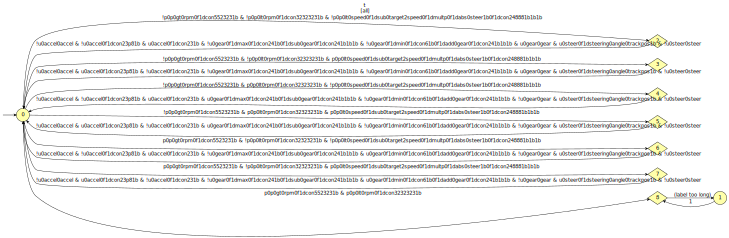

In [21]:
# Bisimulation
si.minimize_lvl = 1
# Turn off relabeling
# div conds is a heuristic allowing relabeling only
# if the number of different conditions is smaller 2^(#APs) / fact_div_conds
si.opt.set("fact_div_conds", 0)
# The relabeling will stop if it involves more than
# (#APs) / fact_div_aps
si.opt.set("fact_div_aps", 0)

mm = spot.reduce_mealy(get_complete_mealy(), si)
mm

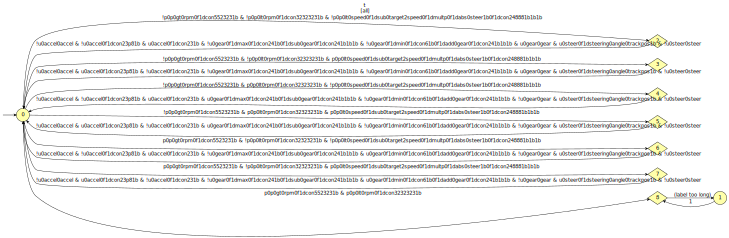

In [22]:
# With relabeling
si.opt.set("fact_div_conds", 1)
si.opt.set("fact_div_aps", 1)

mm = spot.reduce_mealy(get_complete_mealy(), si)
mm

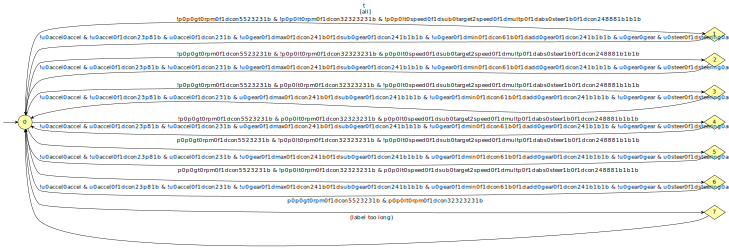

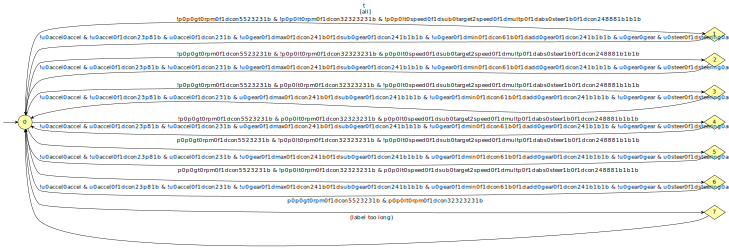

In [23]:
# The same for bwoa
si.minimize_lvl = 2
si.opt.set("fact_div_conds", 0)
si.opt.set("fact_div_aps", 0)
display(spot.reduce_mealy(get_complete_mealy(), si))
si.opt.set("fact_div_conds", 1)
si.opt.set("fact_div_aps", 1)
display(spot.reduce_mealy(get_complete_mealy(), si))

# Test logging for reduction

In [24]:
def get_aut():
    return spot.automaton("""HOA: v1
States: 85
Start: 0
AP: 8 "u0room29shades29ctrl0f1dmove2to0f1dpercent231b1b" "u0room29shades29ctrl0room29shades29ctrl" "p0b0room29shades29closed" "p0p0bright0outside29brightness" "p0b0bed29exit" "p0p0between0t29pm70t29pm8" "p0b0alarm" "p0b0bed29enter"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc deterministic
controllable-AP: 0 1
--BODY--
State: 0
[!0&1&4&6 | !0&1&!7] 1
[0&!1&2&!6&7 | 0&!1&!5&!6&7] 2
[0&!1&2&!4&6&7 | 0&!1&!4&!5&6&7] 3
[0&!1&!2&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
State: 1
[0&!1&!2&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&4&6 | 0&!1&!7] 7
[0&!1&2&!6&7 | 0&!1&!5&!6&7] 8
[0&!1&2&!4&6&7 | 0&!1&!4&!5&6&7] 9
State: 2
[0&!1&!2&!5&!6] 2
[0&!1&!2&!4&!5&6] 3
[0&!1&!2&5&!6] 4
[0&!1&!2&4&6] 7
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[0&!1&!2&!3&!4&5&6] 10
[0&!1&!2&3&!4&5&6] 11
[!0&1&2&!4&6 | 0&!1&2&!4&6] 3
[!0&1&2&!6 | 0&!1&2&!6] 2
State: 3
[0&!1&!2&!3&!4&!5&!7 | 0&!1&!2&!4&!5&6] 3
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!3&!4&5&6 | 0&!1&!2&!3&!4&5&!7] 10
[0&!1&!2&3&!4&5&6 | 0&!1&!2&3&!4&5&!7] 11
[!0&1&2&!4&6 | 0&!1&2&!4&6] 3
[0&!1&!2&!4&!5&!6&7] 12
[0&!1&!2&!3&!4&5&!6&7] 13
[0&!1&!2&4&!5&!6&!7] 14
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&3&!4&!5&!6&!7] 16
[0&!1&!2&3&!4&5&!6&7] 17
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 16
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 12
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 14
State: 4
[0&!1&!2&5&!6] 4
[0&!1&!2&!3&!4&5&6] 5
[0&!1&!2&3&!4&5&6] 6
[0&!1&!2&4&6] 7
[0&!1&!2&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&!6 | 0&!1&2&!6] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
State: 5
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6 | 0&!1&!2&!3&!4&5&!7] 5
[0&!1&!2&3&!4&5&6 | 0&!1&!2&3&!4&5&!7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[0&!1&!2&4&5&!6&!7] 21
[0&!1&!2&!3&!4&!5&!6&!7] 22
[0&!1&!2&4&!5&!6&!7] 23
[0&!1&!2&3&!4&!5&!6&!7] 24
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 24
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 23
State: 6
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6 | 0&!1&!2&!3&!4&5&!7] 5
[0&!1&!2&3&!4&5&6 | 0&!1&!2&3&!4&5&!7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!3&!4&!5&6] 9
[0&!1&!2&!3&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&3&!4&!5&!6&7] 26
[!0&1&!2&3&!4&!5&6] 27
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 26
[!0&1&2&!4&6 | 0&!1&2&!4&6] 27
[0&!1&!2&!3&!4&!5&!6&!7] 22
[!0&1&!2&3&!4&!5&!6&!7] 28
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 28
State: 7
[0&!1&!2&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6 | 0&!1&!2&!7] 7
[0&!1&!2&!5&!6&7] 8
[!0&1&2&4&6 | !0&1&2&!7 | 0&!1&2&4&6 | 0&!1&2&!7] 7
[!0&1&2&!6&7 | 0&!1&2&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
State: 8
[0&!1&!2&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&!6 | 0&!1&2&!6] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[!0&1&!2&!3&!4&5&6] 29
[!0&1&!2&3&!4&5&6] 30
State: 9
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[!0&1&!2&!3&!4&5&6 | !0&1&!2&!3&!4&5&!7] 29
[!0&1&!2&3&!4&5&6 | !0&1&!2&3&!4&5&!7] 30
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&!3&!4&5&!6&7] 31
[!0&1&!2&3&!4&5&!6&7] 32
[!0&1&!2&!3&!4&!5&!6&!7] 9
[!0&1&!2&!4&!5&!6&7] 33
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 33
[!0&1&!2&4&!5&!6&!7] 34
[!0&1&!2&3&!4&!5&!6&!7] 35
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 35
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 34
State: 10
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!3&!4&6 | 0&!1&!2&!3&!4&!7] 10
[0&!1&!2&3&!4&5&6 | 0&!1&!2&3&!4&5&!7] 11
[0&!1&!2&!3&!4&!6&7 | 0&!1&!2&!4&!5&!6&7] 13
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&3&!4&5&!6&7] 17
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[0&!1&!2&3&!4&!5&6 | 0&!1&!2&3&!4&!5&!7] 37
[!0&1&2&!4&6 | !0&1&2&!4&!7 | 0&!1&2&!4&6 | 0&!1&2&!4&!7] 37
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 13
State: 11
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!3&!4&6 | 0&!1&!2&!3&!4&!7] 10
[0&!1&!2&3&!4&5&6 | 0&!1&!2&3&!4&5&!7] 11
[0&!1&!2&!3&!4&!6&7] 13
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&3&!4&5&!6&7] 17
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[!0&1&!2&3&!4&!5&6 | !0&1&!2&3&!4&!5&!7] 11
[!0&1&!2&3&!4&!5&!6&7] 17
[!0&1&2&!4&6 | !0&1&2&!4&!7 | 0&!1&2&!4&6 | 0&!1&2&!4&!7] 11
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 17
State: 12
[0&!1&!2&!4&!5&6] 3
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!3&!4&5&6] 10
[0&!1&!2&3&!4&5&6] 11
[!0&1&2&!4&6 | 0&!1&2&!4&6] 3
[0&!1&!2&!4&!5&!6] 12
[0&!1&!2&!3&!4&5&!6] 13
[0&!1&!2&3&!4&5&!6] 17
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 12
State: 13
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!3&!4&6] 10
[0&!1&!2&3&!4&5&6] 11
[0&!1&!2&!3&!4&!6 | 0&!1&!2&!4&!5&!6] 13
[0&!1&!2&3&!4&5&!6] 17
[0&!1&!2&3&!4&!5&6] 37
[!0&1&2&!4&6 | 0&!1&2&!4&6] 37
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 13
State: 14
[0&!1&!2&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&!6&7 | 0&!1&2&!6&7] 8
[0&!1&!2&!5&!6&!7] 14
[0&!1&!2&5&!6&!7] 15
[!0&1&2&!6&!7 | 0&!1&2&!6&!7] 14
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&6&!7] 38
[0&!1&!2&!3&!4&5&6&!7] 39
[0&!1&!2&3&!4&5&6&!7] 40
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 38
State: 15
[0&!1&!2&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&!6&7 | 0&!1&2&!6&7] 8
[0&!1&!2&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!5&!6&!7] 36
[!0&1&2&!6&!7 | 0&!1&2&!6&!7] 36
[0&!1&!2&!4&!5&6&!7] 41
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 41
[0&!1&!2&!3&!4&5&6&!7] 42
[0&!1&!2&3&!4&5&6&!7] 43
State: 16
[0&!1&!2&!3&!4&!5&!7 | 0&!1&!2&!4&!5&6] 3
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!3&!4&5&6 | 0&!1&!2&!3&!4&5&!7] 10
[0&!1&!2&3&!4&5&6 | 0&!1&!2&3&!4&5&!7] 11
[!0&1&2&!4&6 | 0&!1&2&!4&6] 3
[0&!1&!2&!3&!4&!5&!6&7] 12
[0&!1&!2&!3&!4&5&!6&7] 13
[0&!1&!2&4&!5&!6&!7] 14
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&3&!4&!5&!6&!7] 16
[0&!1&!2&3&!4&5&!6&7] 17
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 16
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 14
[!0&1&!2&3&!4&!5&!6&7] 44
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 44
State: 17
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!3&!4&6] 10
[0&!1&!2&3&!4&5&6] 11
[0&!1&!2&!3&!4&!6] 13
[0&!1&!2&3&!4&5&!6] 17
[!0&1&!2&3&!4&!5&6] 11
[!0&1&!2&3&!4&!5&!6] 17
[!0&1&2&!4&6 | 0&!1&2&!4&6] 11
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 17
State: 18
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[0&!1&!2&!4&!5&!6] 18
[0&!1&!2&!3&!4&5&!6] 19
[0&!1&!2&3&!4&5&!6] 20
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 18
[!0&1&!2&!3&!4&5&6] 29
[!0&1&!2&3&!4&5&6] 30
State: 19
[0&!1&!2&4&5&!6] 4
[0&!1&!2&!3&!4&5&6] 5
[0&!1&!2&3&!4&5&6] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[0&!1&!2&!4&!5&!6] 18
[0&!1&!2&!3&!4&5&!6] 19
[0&!1&!2&3&!4&5&!6] 20
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 18
State: 20
[0&!1&!2&4&5&!6] 4
[0&!1&!2&!3&!4&5&6] 5
[0&!1&!2&3&!4&5&6] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!3&!4&!5&6] 9
[0&!1&!2&!3&!4&!5&!6] 18
[0&!1&!2&!3&!4&5&!6] 19
[0&!1&!2&3&!4&5&!6] 20
[!0&1&!2&3&!4&!5&!6] 26
[!0&1&!2&3&!4&!5&6] 27
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 26
[!0&1&2&!4&6 | 0&!1&2&!4&6] 27
State: 21
[0&!1&!2&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&!6&7 | 0&!1&2&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&5&!6&!7] 21
[!0&1&!2&!5&!6&!7] 25
[!0&1&2&!6&!7 | 0&!1&2&!6&!7] 25
[!0&1&!2&!4&!5&6&!7] 45
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 45
[!0&1&!2&!3&!4&5&6&!7] 46
[!0&1&!2&3&!4&5&6&!7] 47
State: 22
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&!6&!7] 5
[0&!1&!2&3&!4&5&!6&!7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[!0&1&!2&!3&!4&5&6] 29
[!0&1&!2&3&!4&5&6] 30
[0&!1&!2&4&5&!6&!7] 21
[0&!1&!2&!3&!4&!5&!6&!7] 22
[0&!1&!2&4&!5&!6&!7] 23
[0&!1&!2&3&!4&!5&!6&!7] 24
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 24
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 23
State: 23
[0&!1&!2&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&!6&7 | 0&!1&2&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&5&!6&!7] 21
[0&!1&!2&!5&!6&!7] 23
[!0&1&2&!6&!7 | 0&!1&2&!6&!7] 23
[!0&1&!2&!4&!5&6&!7] 48
[!0&1&!2&!3&!4&5&6&!7] 49
[!0&1&!2&3&!4&5&6&!7] 50
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 48
State: 24
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&!6&!7] 5
[0&!1&!2&3&!4&5&!6&!7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[0&!1&!2&!3&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&!2&!3&!4&5&6] 29
[!0&1&!2&3&!4&5&6] 30
[0&!1&!2&4&5&!6&!7] 21
[0&!1&!2&!3&!4&!5&!6&!7] 22
[0&!1&!2&4&!5&!6&!7] 23
[0&!1&!2&3&!4&!5&!6&!7] 24
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 24
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 23
[!0&1&!2&3&!4&!5&!6&7] 51
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 51
State: 25
[0&!1&!2&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&!6&7 | 0&!1&2&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&5&!6&!7] 21
[!0&1&!2&!5&!6&!7] 25
[!0&1&2&!6&!7 | 0&!1&2&!6&!7] 25
[!0&1&!2&!4&!5&6&!7] 45
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 45
[!0&1&!2&!3&!4&5&6&!7] 52
[!0&1&!2&3&!4&5&6&!7] 53
State: 26
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!3&!4&!5&6] 9
[0&!1&!2&!3&!4&!5&!6] 18
[0&!1&!2&!3&!4&5&!6] 19
[0&!1&!2&3&!4&5&!6] 20
[!0&1&!2&!3&!4&5&6] 29
[!0&1&!2&3&!4&!5&!6] 26
[!0&1&!2&3&!4&!5&6] 27
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 26
[!0&1&2&!4&6 | 0&!1&2&!4&6] 27
[!0&1&!2&3&!4&5&6] 54
State: 27
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!3&!4&!5&6] 9
[!0&1&!2&!3&!4&5&6 | !0&1&!2&!3&!4&5&!7] 29
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&5&!6&7] 31
[!0&1&!2&3&!4&!5&6 | !0&1&!2&3&!4&!5&!7] 27
[!0&1&2&!4&6 | !0&1&2&!4&!7 | 0&!1&2&!4&6 | 0&!1&2&!4&!7] 27
[!0&1&!2&!3&!4&!5&!6&!7] 9
[!0&1&!2&!3&!4&!5&!6&7] 33
[!0&1&!2&3&!4&5&6 | !0&1&!2&3&!4&5&!7] 54
[!0&1&!2&3&!4&!5&!6&7] 55
[!0&1&!2&3&!4&5&!6&7] 56
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 55
State: 28
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&!6&!7] 5
[0&!1&!2&3&!4&5&!6&!7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!3&!4&!5&6] 9
[0&!1&!2&!3&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&!2&!3&!4&5&6] 29
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&3&!4&!5&!6&7] 26
[!0&1&!2&3&!4&!5&6] 27
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 26
[!0&1&2&!4&6 | 0&!1&2&!4&6] 27
[!0&1&!2&3&!4&5&6] 54
[0&!1&!2&!3&!4&!5&!6&!7] 22
[!0&1&!2&3&!4&!5&!6&!7] 28
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 28
State: 29
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[!0&1&!2&!3&!4&6 | !0&1&!2&!3&!4&!7] 29
[!0&1&!2&3&!4&5&6 | !0&1&!2&3&!4&5&!7] 30
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!6&7 | !0&1&!2&!4&!5&!6&7] 31
[!0&1&!2&3&!4&5&!6&7] 32
[!0&1&!2&3&!4&!5&6 | !0&1&!2&3&!4&!5&!7] 57
[!0&1&2&!4&6 | !0&1&2&!4&!7 | 0&!1&2&!4&6 | 0&!1&2&!4&!7] 57
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 31
State: 30
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[!0&1&!2&!3&!4&6 | !0&1&!2&!3&!4&!7] 29
[!0&1&!2&3&!4&6 | !0&1&!2&3&!4&!7] 30
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!6&7] 31
[!0&1&!2&3&!4&!6&7] 32
[!0&1&2&!4&6 | !0&1&2&!4&!7 | 0&!1&2&!4&6 | 0&!1&2&!4&!7] 30
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 32
State: 31
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[!0&1&!2&!3&!4&6] 29
[!0&1&!2&3&!4&5&6] 30
[!0&1&!2&!3&!4&!6 | !0&1&!2&!4&!5&!6] 31
[!0&1&!2&3&!4&5&!6] 32
[!0&1&!2&3&!4&!5&6] 57
[!0&1&2&!4&6 | 0&!1&2&!4&6] 57
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 31
State: 32
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[!0&1&!2&!3&!4&6] 29
[!0&1&!2&3&!4&6] 30
[!0&1&!2&!3&!4&!6] 31
[!0&1&!2&3&!4&!6] 32
[!0&1&2&!4&6 | 0&!1&2&!4&6] 30
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 32
State: 33
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[!0&1&!2&!3&!4&5&6] 29
[!0&1&!2&3&!4&5&6] 30
[!0&1&!2&!3&!4&5&!6] 31
[!0&1&!2&3&!4&5&!6] 32
[!0&1&!2&!4&!5&!6] 33
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 33
State: 34
[0&!1&!2&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&!6&7 | 0&!1&2&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&5&!6&!7] 21
[!0&1&!2&!5&!6&!7] 34
[!0&1&2&!6&!7 | 0&!1&2&!6&!7] 34
[!0&1&!2&!4&!5&6&!7] 58
[!0&1&!2&!3&!4&5&6&!7] 59
[!0&1&!2&3&!4&5&6&!7] 60
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 58
State: 35
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[!0&1&!2&!3&!4&5&6 | !0&1&!2&!3&!4&5&!7] 29
[!0&1&!2&3&!4&5&6 | !0&1&!2&3&!4&5&!7] 30
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&!3&!4&5&!6&7] 31
[!0&1&!2&3&!4&5&!6&7] 32
[!0&1&!2&!3&!4&!5&!6&!7] 9
[!0&1&!2&!3&!4&!5&!6&7] 33
[!0&1&!2&4&!5&!6&!7] 34
[!0&1&!2&3&!4&!5&!6&!7] 35
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 35
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 34
[!0&1&!2&3&!4&!5&!6&7] 61
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 61
State: 36
[0&!1&!2&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&!6&7 | 0&!1&2&!6&7] 8
[0&!1&!2&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!5&!6&!7] 36
[!0&1&2&!6&!7 | 0&!1&2&!6&!7] 36
[0&!1&!2&!4&!5&6&!7] 41
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 41
[!0&1&!2&!3&!4&5&6&!7] 62
[!0&1&!2&3&!4&5&6&!7] 63
State: 37
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!3&!4&6 | 0&!1&!2&!3&!4&!7] 10
[0&!1&!2&3&!4&5&6 | 0&!1&!2&3&!4&5&!7] 11
[0&!1&!2&!3&!4&!6&7] 13
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&3&!4&5&!6&7] 17
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[0&!1&!2&3&!4&!5&6 | 0&!1&!2&3&!4&!5&!7] 37
[!0&1&2&!4&6 | !0&1&2&!4&!7 | 0&!1&2&!4&6 | 0&!1&2&!4&!7] 37
[!0&1&!2&3&!4&!5&!6&7] 64
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 64
State: 38
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&!5&!6&!7] 14
[0&!1&!2&4&5&!6&!7] 15
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 14
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&6&!7] 38
[0&!1&!2&!3&!4&5&!7] 39
[0&!1&!2&3&!4&5&!7] 40
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 38
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[0&!1&!2&!3&!4&!5&!6&!7] 65
[0&!1&!2&3&!4&!5&!6&!7] 66
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 66
State: 39
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!3&!4&5&!7] 39
[0&!1&!2&3&!4&5&!7] 40
[!0&1&!2&!3&!4&!6&7 | !0&1&!2&!4&!5&!6&7] 67
[!0&1&!2&3&!4&5&!6&7] 68
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 67
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[!0&1&!2&!3&!4&!5&!7] 39
[!0&1&!2&3&!4&!5&!7] 69
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 69
State: 40
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!3&!4&5&!7] 39
[0&!1&!2&3&!4&5&!7] 40
[!0&1&!2&!3&!4&!6&7] 67
[!0&1&!2&3&!4&!6&7] 68
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 68
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[!0&1&!2&!3&!4&!5&!7] 39
[!0&1&!2&3&!4&!5&!7] 40
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 40
State: 41
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[0&!1&!2&!4&!5&6&!7] 41
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 41
[!0&1&!2&!3&!4&5&!7] 62
[!0&1&!2&3&!4&5&!7] 63
[0&!1&!2&!4&!5&!6&7] 70
[0&!1&!2&!3&!4&5&!6&7] 71
[0&!1&!2&3&!4&5&!6&7] 72
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 70
[!0&1&!2&!4&!5&!6&!7] 41
State: 42
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[0&!1&!2&!4&!5&6&!7] 41
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 41
[0&!1&!2&!4&!5&!6&7] 70
[0&!1&!2&!3&!4&5&!6&7] 71
[0&!1&!2&3&!4&5&!6&7] 72
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 70
[0&!1&!2&!3&!4&5&!7] 42
[0&!1&!2&3&!4&5&!7] 43
[0&!1&!2&!3&!4&!5&!6&!7] 73
[0&!1&!2&3&!4&!5&!6&!7] 74
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 74
State: 43
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[0&!1&!2&!3&!4&!5&6&!7] 41
[0&!1&!2&!3&!4&!5&!6&7] 70
[0&!1&!2&!3&!4&5&!6&7] 71
[0&!1&!2&3&!4&5&!6&7] 72
[!0&1&!2&3&!4&!5&!6&7] 75
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 75
[0&!1&!2&!3&!4&5&!7] 42
[0&!1&!2&3&!4&5&!7] 43
[0&!1&!2&!3&!4&!5&!6&!7] 73
[!0&1&!2&3&!4&!5&!6&!7] 76
[!0&1&!2&3&!4&!5&6&!7] 77
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 76
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 77
State: 44
[0&!1&!2&!4&!5&6] 3
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!3&!4&5&6] 10
[0&!1&!2&3&!4&5&6] 11
[!0&1&2&!4&6 | 0&!1&2&!4&6] 3
[0&!1&!2&!3&!4&!5&!6] 12
[0&!1&!2&!3&!4&5&!6] 13
[0&!1&!2&3&!4&5&!6] 17
[!0&1&!2&3&!4&!5&!6] 44
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 44
State: 45
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!4&!5&!7] 45
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 45
[!0&1&!2&!3&!4&5&!7] 52
[!0&1&!2&3&!4&5&!7] 53
State: 46
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[!0&1&!2&!3&!4&!6&7 | !0&1&!2&!4&!5&!6&7] 67
[!0&1&!2&3&!4&5&!6&7] 68
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 67
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!4&!5&6&!7] 45
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 45
[!0&1&!2&!3&!4&5&!7] 46
[!0&1&!2&3&!4&5&!7] 47
[!0&1&!2&!3&!4&!5&!6&!7] 78
[!0&1&!2&3&!4&!5&!6&!7] 79
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 79
State: 47
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[!0&1&!2&!3&!4&!6&7] 67
[!0&1&!2&3&!4&!6&7] 68
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 68
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!5&6&!7] 45
[!0&1&!2&!3&!4&5&!7] 46
[!0&1&!2&3&!4&5&!7] 47
[!0&1&!2&!3&!4&!5&!6&!7] 78
[!0&1&!2&3&!4&!5&!6&!7] 80
[!0&1&!2&3&!4&!5&6&!7] 81
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 80
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 81
State: 48
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 34
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 34
[!0&1&!2&!4&!5&!7] 48
[!0&1&!2&!3&!4&5&!7] 49
[!0&1&!2&3&!4&5&!7] 50
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 48
State: 49
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!7 | !0&1&!2&!4&!5&!7] 49
[!0&1&!2&3&!4&5&!7] 50
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 49
State: 50
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!7] 49
[!0&1&!2&3&!4&!7] 50
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 50
State: 51
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[0&!1&!2&!3&!4&!5&!6] 18
[0&!1&!2&!3&!4&5&!6] 19
[0&!1&!2&3&!4&5&!6] 20
[!0&1&!2&!3&!4&5&6] 29
[!0&1&!2&3&!4&5&6] 30
[!0&1&!2&3&!4&!5&!6] 51
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 51
State: 52
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!7 | !0&1&!2&!4&!5&!7] 52
[!0&1&!2&3&!4&5&!7] 53
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 52
State: 53
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!7] 52
[!0&1&!2&3&!4&!7] 53
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 53
State: 54
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[!0&1&!2&!3&!4&6 | !0&1&!2&!3&!4&!7] 29
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!6&7] 31
[!0&1&!2&3&!4&6 | !0&1&!2&3&!4&!7] 54
[!0&1&!2&3&!4&!6&7] 56
[!0&1&2&!4&6 | !0&1&2&!4&!7 | 0&!1&2&!4&6 | 0&!1&2&!4&!7] 54
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 56
State: 55
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!3&!4&!5&6] 9
[!0&1&!2&!3&!4&5&6] 29
[!0&1&!2&!3&!4&5&!6] 31
[!0&1&!2&3&!4&!5&6] 27
[!0&1&2&!4&6 | 0&!1&2&!4&6] 27
[!0&1&!2&!3&!4&!5&!6] 33
[!0&1&!2&3&!4&5&6] 54
[!0&1&!2&3&!4&!5&!6] 55
[!0&1&!2&3&!4&5&!6] 56
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 55
State: 56
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[!0&1&!2&!3&!4&6] 29
[!0&1&!2&!3&!4&!6] 31
[!0&1&!2&3&!4&6] 54
[!0&1&!2&3&!4&!6] 56
[!0&1&2&!4&6 | 0&!1&2&!4&6] 54
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 56
State: 57
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[!0&1&!2&!3&!4&6 | !0&1&!2&!3&!4&!7] 29
[!0&1&!2&3&!4&5&6 | !0&1&!2&3&!4&5&!7] 30
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!6&7] 31
[!0&1&!2&3&!4&5&!6&7] 32
[!0&1&!2&3&!4&!5&6 | !0&1&!2&3&!4&!5&!7] 57
[!0&1&2&!4&6 | !0&1&2&!4&!7 | 0&!1&2&!4&6 | 0&!1&2&!4&!7] 57
[!0&1&!2&3&!4&!5&!6&7] 82
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 82
State: 58
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 34
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 34
[!0&1&!2&!4&!5&!7] 58
[!0&1&!2&!3&!4&5&!7] 59
[!0&1&!2&3&!4&5&!7] 60
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 58
State: 59
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!7 | !0&1&!2&!4&!5&!7] 59
[!0&1&!2&3&!4&5&!7] 60
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 59
State: 60
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!7] 59
[!0&1&!2&3&!4&!7] 60
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 60
State: 61
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[!0&1&!2&!3&!4&5&6] 29
[!0&1&!2&3&!4&5&6] 30
[!0&1&!2&!3&!4&5&!6] 31
[!0&1&!2&3&!4&5&!6] 32
[!0&1&!2&!3&!4&!5&!6] 33
[!0&1&!2&3&!4&!5&!6] 61
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 61
State: 62
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[!0&1&!2&!3&!4&!7 | !0&1&!2&!4&!5&!7] 62
[!0&1&!2&3&!4&5&!7] 63
[0&!1&!2&!4&!5&!6&7] 70
[0&!1&!2&!3&!4&5&!6&7] 71
[0&!1&!2&3&!4&5&!6&7] 72
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 70
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 62
State: 63
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[!0&1&!2&!3&!4&!7] 62
[!0&1&!2&3&!4&!7] 63
[0&!1&!2&!4&!5&!6&7] 70
[0&!1&!2&!3&!4&5&!6&7] 71
[0&!1&!2&3&!4&5&!6&7] 72
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 70
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 63
State: 64
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!3&!4&6] 10
[0&!1&!2&3&!4&5&6] 11
[0&!1&!2&!3&!4&!6] 13
[0&!1&!2&3&!4&5&!6] 17
[0&!1&!2&3&!4&!5&6] 37
[!0&1&2&!4&6 | 0&!1&2&!4&6] 37
[!0&1&!2&3&!4&!5&!6] 64
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 64
State: 65
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&!5&!6&!7] 14
[0&!1&!2&4&5&!6&!7] 15
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 14
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&6&!7] 38
[0&!1&!2&!3&!4&5&!7] 39
[0&!1&!2&3&!4&5&!7] 40
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 38
[0&!1&!2&!3&!4&!5&!6&!7] 65
[0&!1&!2&3&!4&!5&!6&!7] 66
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 66
[!0&1&!2&!3&!4&!6&7 | !0&1&!2&!4&!5&!6&7] 67
[!0&1&!2&3&!4&5&!6&7] 68
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 67
State: 66
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&!5&!6&!7] 14
[0&!1&!2&4&5&!6&!7] 15
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 14
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&6&!7] 38
[0&!1&!2&!3&!4&5&!7] 39
[0&!1&!2&3&!4&5&!7] 40
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 38
[0&!1&!2&!3&!4&!5&!6&!7] 65
[0&!1&!2&3&!4&!5&!6&!7] 66
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 66
[!0&1&!2&!3&!4&!6&7] 67
[!0&1&!2&3&!4&!6&7] 68
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 68
State: 67
[0&!1&!2&4&5&!6] 4
[0&!1&!2&!3&!4&5&6] 5
[0&!1&!2&3&!4&5&6] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[!0&1&!2&!3&!4&!6 | !0&1&!2&!4&!5&!6] 67
[!0&1&!2&3&!4&5&!6] 68
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 67
State: 68
[0&!1&!2&4&5&!6] 4
[0&!1&!2&!3&!4&5&6] 5
[0&!1&!2&3&!4&5&6] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[!0&1&!2&!3&!4&!6] 67
[!0&1&!2&3&!4&!6] 68
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 68
State: 69
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!3&!4&5&!7] 39
[0&!1&!2&3&!4&5&!7] 40
[!0&1&!2&!3&!4&!6&7] 67
[!0&1&!2&3&!4&!6&7] 68
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 68
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[!0&1&!2&!3&!4&!5&!7] 39
[!0&1&!2&3&!4&!5&!7] 69
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 69
State: 70
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[!0&1&!2&!3&!4&5&6] 29
[!0&1&!2&3&!4&5&6] 30
[0&!1&!2&!4&!5&!6] 70
[0&!1&!2&!3&!4&5&!6] 71
[0&!1&!2&3&!4&5&!6] 72
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 70
State: 71
[0&!1&!2&4&5&!6] 4
[0&!1&!2&!3&!4&5&6] 5
[0&!1&!2&3&!4&5&6] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[0&!1&!2&!4&!5&!6] 70
[0&!1&!2&!3&!4&5&!6] 71
[0&!1&!2&3&!4&5&!6] 72
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 70
State: 72
[0&!1&!2&4&5&!6] 4
[0&!1&!2&!3&!4&5&6] 5
[0&!1&!2&3&!4&5&6] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[0&!1&!2&!3&!4&!5&!6] 70
[0&!1&!2&!3&!4&5&!6] 71
[0&!1&!2&3&!4&5&!6] 72
[!0&1&!2&3&!4&!5&!6] 75
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 75
State: 73
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[0&!1&!2&!4&!5&6&!7] 41
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 41
[!0&1&!2&!3&!4&5&6&!7] 62
[!0&1&!2&3&!4&5&6&!7] 63
[0&!1&!2&!4&!5&!6&7] 70
[0&!1&!2&!3&!4&5&!6&7] 71
[0&!1&!2&3&!4&5&!6&7] 72
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 70
[0&!1&!2&!3&!4&5&!6&!7] 42
[0&!1&!2&3&!4&5&!6&!7] 43
[0&!1&!2&!3&!4&!5&!6&!7] 73
[0&!1&!2&3&!4&!5&!6&!7] 74
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 74
State: 74
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[0&!1&!2&!4&!5&6&!7] 41
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 41
[!0&1&!2&!3&!4&5&6&!7] 62
[!0&1&!2&3&!4&5&6&!7] 63
[0&!1&!2&!3&!4&!5&!6&7] 70
[0&!1&!2&!3&!4&5&!6&7] 71
[0&!1&!2&3&!4&5&!6&7] 72
[!0&1&!2&3&!4&!5&!6&7] 75
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 75
[0&!1&!2&!3&!4&5&!6&!7] 42
[0&!1&!2&3&!4&5&!6&!7] 43
[0&!1&!2&!3&!4&!5&!6&!7] 73
[0&!1&!2&3&!4&!5&!6&!7] 74
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 74
State: 75
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[0&!1&!2&!4&!5&6] 9
[!0&1&2&!4&6 | 0&!1&2&!4&6] 9
[!0&1&!2&!3&!4&5&6] 29
[!0&1&!2&3&!4&5&6] 30
[0&!1&!2&!3&!4&!5&!6] 70
[0&!1&!2&!3&!4&5&!6] 71
[0&!1&!2&3&!4&5&!6] 72
[!0&1&!2&3&!4&!5&!6] 75
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 75
State: 76
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[0&!1&!2&!3&!4&!5&6&!7] 41
[!0&1&!2&!3&!4&5&6&!7] 62
[0&!1&!2&!3&!4&!5&!6&7] 70
[0&!1&!2&!3&!4&5&!6&7] 71
[0&!1&!2&3&!4&5&!6&7] 72
[!0&1&!2&3&!4&!5&!6&7] 75
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 75
[0&!1&!2&!3&!4&5&!6&!7] 42
[0&!1&!2&3&!4&5&!6&!7] 43
[0&!1&!2&!3&!4&!5&!6&!7] 73
[!0&1&!2&3&!4&!5&!6&!7] 76
[!0&1&!2&3&!4&!5&6&!7] 77
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 76
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 77
[!0&1&!2&3&!4&5&6&!7] 83
State: 77
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[0&!1&!2&!3&!4&!5&6&!7] 41
[!0&1&!2&!3&!4&5&!7] 62
[0&!1&!2&!4&!5&!6&7] 70
[0&!1&!2&!3&!4&5&!6&7] 71
[0&!1&!2&3&!4&5&!6&7] 72
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 70
[!0&1&!2&!3&!4&!5&!6&!7] 41
[!0&1&!2&3&!4&!5&!7] 77
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 77
[!0&1&!2&3&!4&5&!7] 83
State: 78
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[!0&1&!2&!3&!4&!6&7 | !0&1&!2&!4&!5&!6&7] 67
[!0&1&!2&3&!4&5&!6&7] 68
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 67
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!4&!5&6&!7] 45
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 45
[!0&1&!2&!3&!4&5&6&!7] 52
[!0&1&!2&3&!4&5&6&!7] 53
[!0&1&!2&!3&!4&5&!6&!7] 46
[!0&1&!2&3&!4&5&!6&!7] 47
[!0&1&!2&!3&!4&!5&!6&!7] 78
[!0&1&!2&3&!4&!5&!6&!7] 79
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 79
State: 79
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[!0&1&!2&!3&!4&!6&7] 67
[!0&1&!2&3&!4&!6&7] 68
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 68
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!4&!5&6&!7] 45
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 45
[!0&1&!2&!3&!4&5&6&!7] 52
[!0&1&!2&3&!4&5&6&!7] 53
[!0&1&!2&!3&!4&5&!6&!7] 46
[!0&1&!2&3&!4&5&!6&!7] 47
[!0&1&!2&!3&!4&!5&!6&!7] 78
[!0&1&!2&3&!4&!5&!6&!7] 79
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 79
State: 80
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[!0&1&!2&!3&!4&!6&7] 67
[!0&1&!2&3&!4&!6&7] 68
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 68
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!5&6&!7] 45
[!0&1&!2&!3&!4&5&6&!7] 52
[!0&1&!2&!3&!4&5&!6&!7] 46
[!0&1&!2&3&!4&5&!6&!7] 47
[!0&1&!2&!3&!4&!5&!6&!7] 78
[!0&1&!2&3&!4&!5&!6&!7] 80
[!0&1&!2&3&!4&!5&6&!7] 81
[!0&1&2&!4&!6&!7 | 0&!1&2&!4&!6&!7] 80
[!0&1&2&!4&6&!7 | 0&!1&2&!4&6&!7] 81
[!0&1&!2&3&!4&5&6&!7] 84
State: 81
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!5&!7] 45
[!0&1&!2&!3&!4&5&!7] 52
[!0&1&!2&3&!4&!5&!7] 81
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 81
[!0&1&!2&3&!4&5&!7] 84
State: 82
[0&!1&!2&4&5&!6] 4
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6 | 0&!1&2&4&!6] 8
[!0&1&!2&!3&!4&6] 29
[!0&1&!2&3&!4&5&6] 30
[!0&1&!2&!3&!4&!6] 31
[!0&1&!2&3&!4&5&!6] 32
[!0&1&!2&3&!4&!5&6] 57
[!0&1&2&!4&6 | 0&!1&2&!4&6] 57
[!0&1&!2&3&!4&!5&!6] 82
[!0&1&2&!4&!6 | 0&!1&2&!4&!6] 82
State: 83
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&4&5&!6&!7] 15
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&4&!5&!6&!7] 36
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 36
[!0&1&!2&!3&!4&!7] 62
[0&!1&!2&!4&!5&!6&7] 70
[0&!1&!2&!3&!4&5&!6&7] 71
[0&!1&!2&3&!4&5&!6&7] 72
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 70
[!0&1&!2&3&!4&!7] 83
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 83
State: 84
[0&!1&!2&4&5&!6&7] 4
[0&!1&!2&!3&!4&5&6&7] 5
[0&!1&!2&3&!4&5&6&7] 6
[0&!1&!2&4&6] 7
[0&!1&!2&4&!5&!6&7] 8
[!0&1&2&4&6 | 0&!1&2&4&6] 7
[!0&1&2&4&!6&7 | 0&!1&2&4&!6&7] 8
[0&!1&!2&!4&!5&6&7] 9
[!0&1&2&!4&6&7 | 0&!1&2&!4&6&7] 9
[0&!1&!2&!4&!5&!6&7] 18
[0&!1&!2&!3&!4&5&!6&7] 19
[0&!1&!2&3&!4&5&!6&7] 20
[!0&1&2&!4&!6&7 | 0&!1&2&!4&!6&7] 18
[0&!1&!2&4&5&!6&!7] 21
[!0&1&!2&4&!5&!6&!7] 25
[!0&1&2&4&!6&!7 | 0&!1&2&4&!6&!7] 25
[!0&1&!2&!3&!4&!7] 52
[!0&1&!2&3&!4&!7] 84
[!0&1&2&!4&!7 | 0&!1&2&!4&!7] 84
--END--
""")

# Relabeling not possible for unsplit

In [25]:
mmr, stats = spot.reduce_mealy(get_aut(), True, True, True)
print(mmr.num_states(), mmr.num_edges())

,relabel_partition_time,relabel_time,total_time,n_letters_part_env,n_letters_part_play,n_states
0,NaN,NaN,0.00268894,NaN,NaN,56


56 938


In [26]:
mmr2 = get_aut()
stats2 = spot.reduce_mealy_here(mmr2, True, True, True)
print(mmr2.num_states(), mmr2.num_edges())

,relabel_partition_time,relabel_time,total_time,n_letters_part_env,n_letters_part_play,n_states
0,NaN,NaN,0.00265016,NaN,NaN,56


56 938


In [27]:
def get_aut_split():
    return spot.split_2step(get_aut(), False)

Base config is too restrictive to allow relabeling

In [28]:
mmr, stats = spot.reduce_mealy(get_aut_split(), True, True, True)
print(mmr.num_states(), mmr.num_edges())

,relabel_partition_time,relabel_time,total_time,n_letters_part_env,n_letters_part_play,n_states
0,NaN,0.000130915,0.00434667,0,0,56


180 1062


In [29]:
mmr2 = get_aut_split()
stats2 = spot.reduce_mealy_here(mmr2, True, True, True)
print(mmr2.num_states(), mmr2.num_edges())

,relabel_partition_time,relabel_time,total_time,n_letters_part_env,n_letters_part_play,n_states
0,NaN,0.000139971,0.00525292,0,0,56


180 1062


With relabeling

In [30]:
si = spot.synthesis_info()
si.minimize_lvl = 2
si.opt.set("red_fact_div_conds", 1)
si.opt.set("red_fact_div_aps", 1)

0

In [31]:
mmr, stats = spot.reduce_mealy(get_aut_split(), si, True, True)
print(mmr.num_states(), mmr.num_edges())

,relabel_partition_time,relabel_time,total_time,n_letters_part_env,n_letters_part_play,n_states
0,NaN,0.000383487,0.00423379,0,3,56


180 1062


In [32]:
mmr2 = get_aut_split()
stats2 = spot.reduce_mealy_here(mmr2, si, True, True)
print(mmr2.num_states(), mmr2.num_edges())

,relabel_partition_time,relabel_time,total_time,n_letters_part_env,n_letters_part_play,n_states
0,NaN,0.000384097,0.00367592,0,3,56


180 1062


In [36]:
auts = get_aut_split()
orig_conds_in = []
orig_conds_out = []
sp = spot.get_state_players(auts)
for e in auts.edges():
    if sp[e.dst] and (e.cond not in orig_conds_in):
        orig_conds_in.append(e.cond)
    if not sp[e.dst] and (e.cond not in orig_conds_out):
        orig_conds_out.append(e.cond)
    
        
rmg = spot.partitioned_game_relabel_here(auts, True, True, False, False)
print(len(orig_conds_in), rmg.env_map.size(), sep = "; ")
print(len(orig_conds_out), rmg.player_map.size(), sep = "; ")

83; 85
3; 3
